In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import keras
keras.__version__

'2.4.3'

In [2]:
from keras.datasets import mnist
from keras.utils import to_categorical

In [3]:
image_size = (32,32)
batch_size = 32
train_flow_path = '/Users/dmitry/Images/train' 
test_flow_path = '/Users/dmitry/Images/test'

In [4]:
data_gen_train = keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
)

data_gen_test = keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
)

train_images = data_gen_train.flow_from_directory(
    train_flow_path,
    target_size = image_size,
    batch_size = batch_size,
    color_mode = 'rgb',
    classes = ['A', 'B', 'D', 'E', 'G'],
    class_mode = 'categorical',
    shuffle = True,
    seed = 42
)

test_images = data_gen_test.flow_from_directory(
    test_flow_path,
    target_size = image_size,
    batch_size = batch_size,
    color_mode = 'rgb',
    classes = ['A','B', 'D', 'E', 'G'],
    class_mode = 'categorical',
    shuffle = True,
    seed = 42
)

Found 1000 images belonging to 5 classes.
Found 500 images belonging to 5 classes.


In [5]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout,Flatten, BatchNormalization

In [6]:
model = Sequential()
model.add(Flatten(input_shape=[32,32,3]))
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(5, activation='softmax'))
model.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               786688    
_________________________________________________________________
batch_normalization (BatchNo (None, 256)               1024      
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 3

In [7]:
history = model.fit(train_images, epochs=50, validation_data = test_images)

/usr/local/lib/python3.8/site-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.8/site-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/50
32/32 [==============================] - 1s 41ms/step - loss: 1.1657 - accuracy: 0.5580 - val_loss: 17.8554 - val_accuracy: 0.2060
Epoch 2/50
32/32 [==============================] - 1s 27ms/step - loss: 0.5196 - accuracy: 0.8610 - val_loss: 13.7630 - val_accuracy: 0.2620
Epoch 3/50
32/32 [==============================] - 1s 29ms/step - loss: 0.3150 - accuracy: 0.8980 - val_loss: 22.1878 - val_accuracy: 0.2020
Epoch 4/50
32/32 [==============================] - 1s 22ms/step - loss: 0.2404 - accuracy: 0.9170 - val_loss: 13.1113 - val_accuracy: 0.2300
Epoch 5/50
32/32 [==============================] - 1s 22ms/step - loss: 0.2453 - accuracy: 0.9170 - val_loss: 4.2895 - val_accuracy: 0.2620
Epoch 6/50
32/32 [==============================] - 1s 22ms/step - loss: 0.1989 - accuracy: 0.9340 - val_loss: 14.0318 - val_accuracy: 0.1940
Epoch 7/50
32/32 [==============================] - 1s 22ms/step - loss: 0.2069 - accuracy: 0.9320 - val_loss: 17.2193 - val_accuracy: 0.2080
Epoch 8

In [8]:
scores = model.evaluate(test_images)
print(f'* Loss = {scores[0]}\n* Accuracy = {scores[1]}')

16/16 [==============================] - 0s 14ms/step - loss: 12.7837 - accuracy: 0.3200
* Loss = 12.78366470336914
* Accuracy = 0.3199999928474426


In [9]:
from keras.utils.vis_utils import plot_model

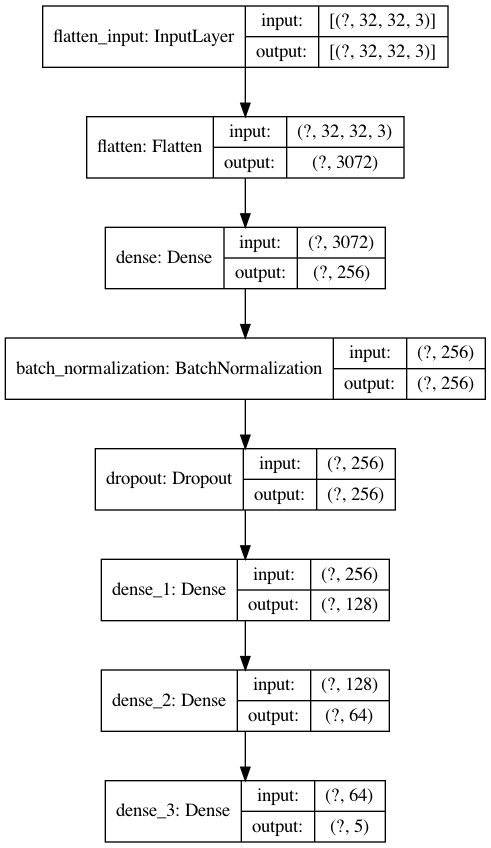

In [10]:
plot_model(model, to_file='./Multy_layer_model.png', show_shapes=True, show_layer_names=True)

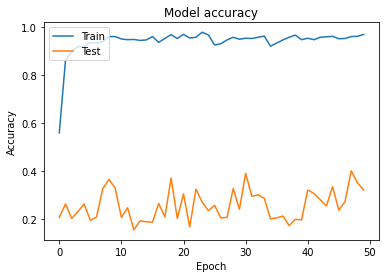

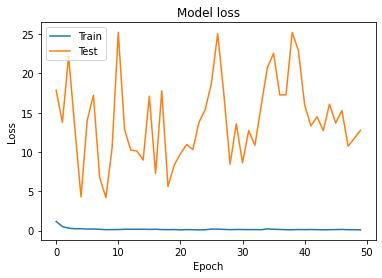

In [11]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig('./Multy_layer_accuracy.png')
plt.show()
#
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig('./Multy_layer_loss.png')
plt.show()